In [1]:
# import libraries
import cv2
from cv2 import CascadeClassifier, imread

# check cv2 version
print("OpenCV version: " + cv2.__version__)

OpenCV version: 4.7.0


## How to Detect Faces for Face Recognition
Before we can perform face recognition, we need to detect faces.

`Face detection` is the process of automatically locating faces in a photograph and localizing them by drawing a bounding box around their extent.

In [2]:
# import libraries
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from numpy import asarray
from PIL import Image

In [3]:
# load image from file
img = plt.imread("headshots/Marwan Musa/1.jpg")

# create the detector, using default weights
detector = MTCNN()

# detect faces in the image
res = detector.detect_faces(img)

1/1 [==============================] - 0s 209ms/step


In [4]:
# extract the bounding box from the first face
x1, y1, width, height = res[0]['box']
x2, y2 = x1+width, y1+height

# extract the face
face = img[y1:y2, x1:x2]

In [5]:
# resize pixels to the model size
image = Image.fromarray(face)
image = image.resize((224, 224))
face_array = asarray(image)

In [6]:
type(face_array)

numpy.ndarray

In [7]:
# unite all the code above in a function extract_face()

# import libraries
import matplotlib.pyplot as plt
import numpy

from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input
from mtcnn.mtcnn import MTCNN
from numpy import asarray
from PIL import Image
from scipy.spatial.distance import cosine

# extract a single face from a given photograph
def extract_face(filename : str, required_size : tuple = (224, 224)) -> numpy.array:
    # load img from file
    img = plt.imread(filename)

    # create detector using default weigths
    detector = MTCNN()

    # detect faces in the image
    res = detector.detect_faces(img)

    # extract the bounding box from the first face
    x1, y1, width, height = res[0]['box']
    x2, y2 = x1+width, y1+height

    # extract the face
    face = img[y1:y2, x1:x2]

    # resize image to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

1/1 [==============================] - 0s 301ms/step


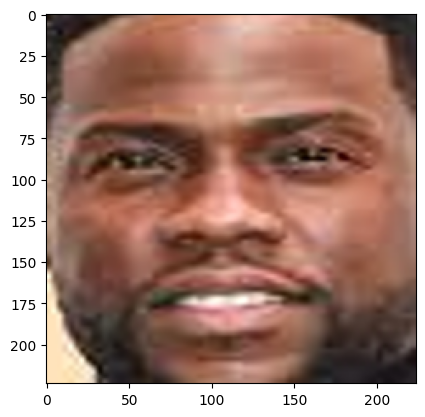

In [8]:
# load the photo and extract the face
img = extract_face("headshots/Kevin Hart/3.jpg")
# plot the extracted face
plt.imshow(img)
# show the plot
plt.show()

In [9]:
# extract faces and calculate face embeddings for a list of photo files
def get_embeddings(filenames):
    #extract faces
    faces = [extract_face(filename) for filename in filenames]
    # convert into an array of samples
    samples = asarray(faces, 'float32')
    # prepare the face for the model, e.g. center pixels
    samples = preprocess_input(samples, version=2)
    # create a vggface model
    model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
    # perform prediction
    yhat = model.predict(samples)
    return yhat

# determine if a candidate face is a match for a know face
def is_match(known_embedding, candidate_embedding, thresh=0.5):
    # calculate distance between embeddings
    score = cosine(known_embedding, candidate_embedding)
    if score <= thresh:
        print(">face is a Match (%.3f <= %.3f)" % (score, thresh))
    else:
        print(">face is NOT a Match (%.3f > %.3f)" % (score, thresh))


In [10]:
# define filenames
filenames = [
    "headshots/Marwan Musa/1.jpg",
    "headshots/Marwan Musa/2.jpg",
    "headshots/Marwan Musa/3.jpg",
    "headshots/Kevin Hart/1.jpg"
]

In [11]:
# get embeddings file filenames
embeddings = get_embeddings(filenames)
# define my face
myface_id = embeddings[0]
# verify known photos of me
print('Positive Tests')
is_match(myface_id, embeddings[1])
is_match(myface_id, embeddings[2])
# verify known photos of other people
print('Negative Tests')
is_match(myface_id, embeddings[3])

1/1 [==============================] - 1s 1s/step
Positive Tests
>face is a Match (0.290 <= 0.500)
>face is a Match (0.252 <= 0.500)
Negative Tests
>face is NOT a Match (0.791 > 0.500)
